# Linear Regression in TensorFlow
## Updated for Python 3.6+

Credits: Forked from [TensorFlow-Examples](https://github.com/aymericdamien/TensorFlow-Examples) by Aymeric Damien

## Setup

Refer to the [setup instructions](http://nbviewer.ipython.org/github/donnemartin/data-science-ipython-notebooks/blob/master/deep-learning/tensor-flow-examples/Setup_TensorFlow.md)

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [5]:
# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [7]:
# Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

In [8]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [9]:
# Initializing the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch: 0001 cost= 4.036506653 W= -0.129287 b= 0.502527
Epoch: 0051 cost= 0.080105469 W= 0.280994 b= 0.575571
Epoch: 0101 cost= 0.079743326 W= 0.279127 b= 0.589008
Epoch: 0151 cost= 0.079423159 W= 0.27737 b= 0.601645
Epoch: 0201 cost= 0.079140082 W= 0.275718 b= 0.613531
Epoch: 0251 cost= 0.078889869 W= 0.274164 b= 0.624707
Epoch: 0301 cost= 0.078668654 W= 0.272703 b= 0.635219
Epoch: 0351 cost= 0.078473099 W= 0.271329 b= 0.645105
Epoch: 0401 cost= 0.078300200 W= 0.270036 b= 0.654404
Epoch: 0451 cost= 0.078147389 W= 0.26882 b= 0.663149
Epoch: 0501 cost= 0.078012303 W= 0.267677 b= 0.671376
Epoch: 0551 cost= 0.077892922 W= 0.266602 b= 0.679112
Epoch: 0601 cost= 0.077787377 W= 0.26559 b= 0.686389
Epoch: 0651 cost= 0.077694103 W= 0.264639 b= 0.693233
Epoch: 0701 cost= 0.077611685 W= 0.263744 b= 0.69967
Epoch: 0751 cost= 0.077538833 W= 0.262902 b= 0.705724
Epoch: 0801 cost= 0.077474467 W= 0.262111 b= 0.711419
Epoch: 0851 cost= 0.077417582 W= 0.261366 b= 0.716774
Epoch: 0901 cost= 0.077367350 W

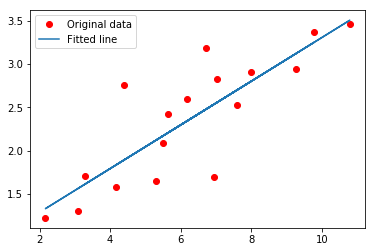

In [11]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [ ]:
from IPython.display import Image
Image(filename='linearreg.png')